<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import modules**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix

**Import data**

In [ ]:
data = pd.read_csv('5a_iris_mvs.csv')

**Count the percentage of variables with MVs**

In [ ]:
missing_percentage = data.isnull().mean() * 100

print("Percentage of Missing Values in Each Column:")
print(missing_percentage)


Percentage of Missing Values in Each Column:
sepal_length     1.333333
sepal_width     12.000000
petal_length     5.333333
petal_width     31.333333
species          0.000000
dtype: float64


Petal width has a significant high number of missing values. Thus, we will delete the entire column. We will keep the others.

In [ ]:
data = data.drop(columns=['petal_width'])
print(data.head())

   sepal_length  sepal_width  petal_length species
0           5.1          3.5           1.4  setosa
1           4.9          NaN           1.4  setosa
2           4.7          3.2           1.3  setosa
3           4.6          3.1           1.5  setosa
4           5.0          3.6           1.4  setosa


**Count the percentage of items with MVs**

Since we have only 3 varibles, we will compute the number (instead of the percentage)

In [ ]:
missing_per_item = data.isnull().mean(axis=1)*100
print(missing_per_item)


0       0.0
1      25.0
2       0.0
3       0.0
4       0.0
       ... 
145     0.0
146     0.0
147    50.0
148     0.0
149     0.0
Length: 150, dtype: float64


**How many items have more than 30% missing values? We will remove them.**

In [ ]:
data = data[missing_per_item <= 30]

print(data.head())
print(data.shape)


   sepal_length  sepal_width  petal_length species
0           5.1          3.5           1.4  setosa
1           4.9          NaN           1.4  setosa
2           4.7          3.2           1.3  setosa
3           4.6          3.1           1.5  setosa
4           5.0          3.6           1.4  setosa
(148, 4)


**Plot the distribution of data**

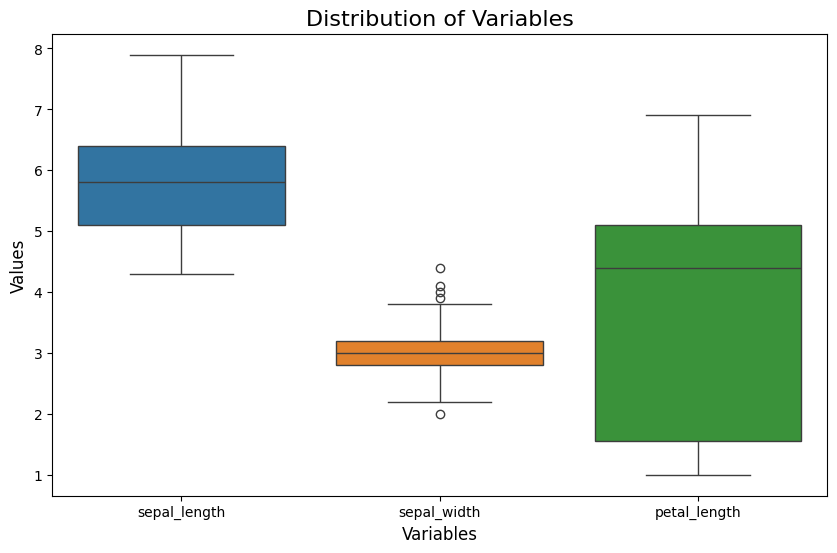

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[:][:-1])
plt.title('Distribution of Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

**1. Imputation using the mean value. Focus on the variable sepal_width for simplicity**

In [ ]:
data_imputed = data.copy()  # Make a copy of the cleaned dataset
data_imputed = data_imputed.apply(lambda col: col.fillna(col.mean()) if col.isnull().any() else col, axis=0)

print(data_imputed.head())


   sepal_length  sepal_width  petal_length species
0           5.1     3.500000           1.4  setosa
1           4.9     3.022727           1.4  setosa
2           4.7     3.200000           1.3  setosa
3           4.6     3.100000           1.5  setosa
4           5.0     3.600000           1.4  setosa


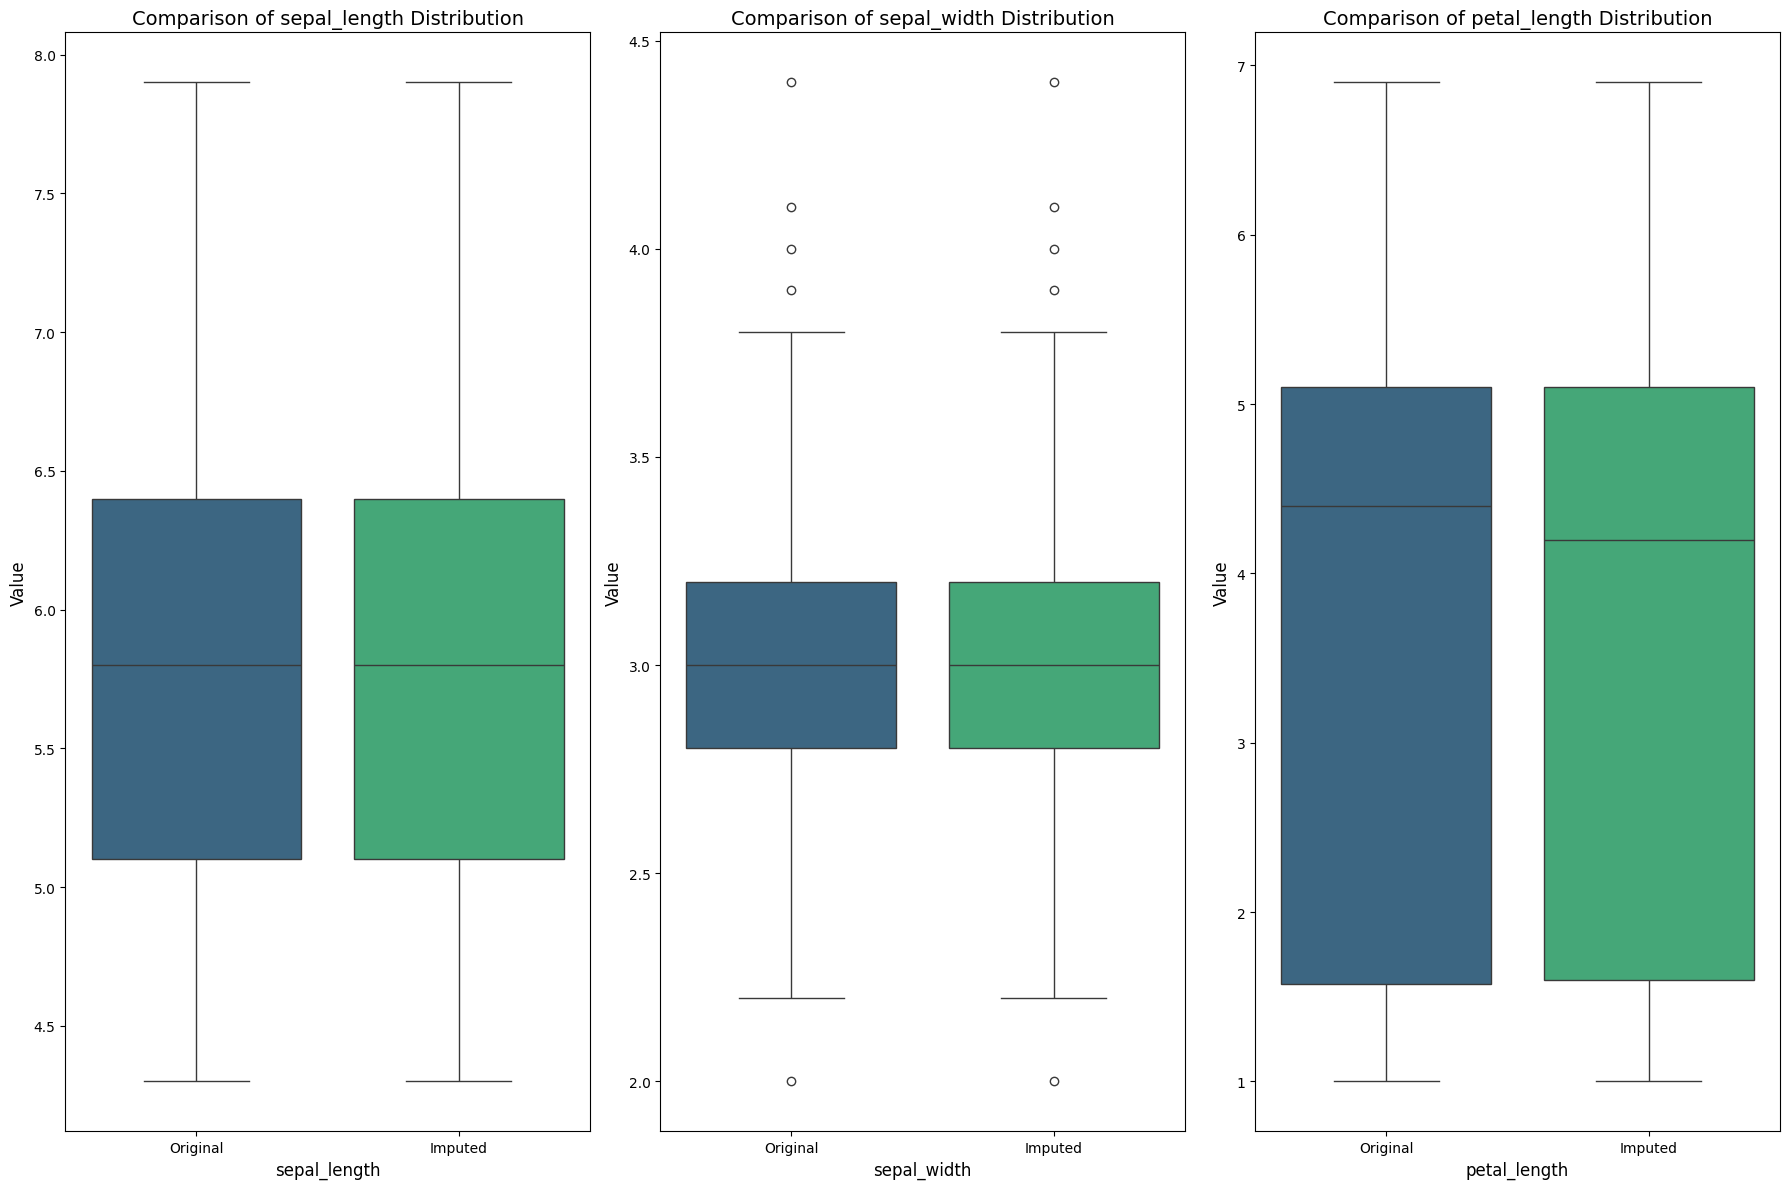

In [ ]:
variables = ['sepal_length', 'sepal_width', 'petal_length']

plt.figure(figsize=(18, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    comparison_data = pd.DataFrame({
        'Original': data[var],
        'Imputed': data_imputed[var]
    })
    sns.boxplot(data=comparison_data, palette='viridis')
    plt.title(f'Comparison of {var} Distribution', fontsize=14)
    plt.xlabel(f'{var}', fontsize=12)
    plt.ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()



Considering sepal_width, let's see if the distribution hasn't change even inside each class.

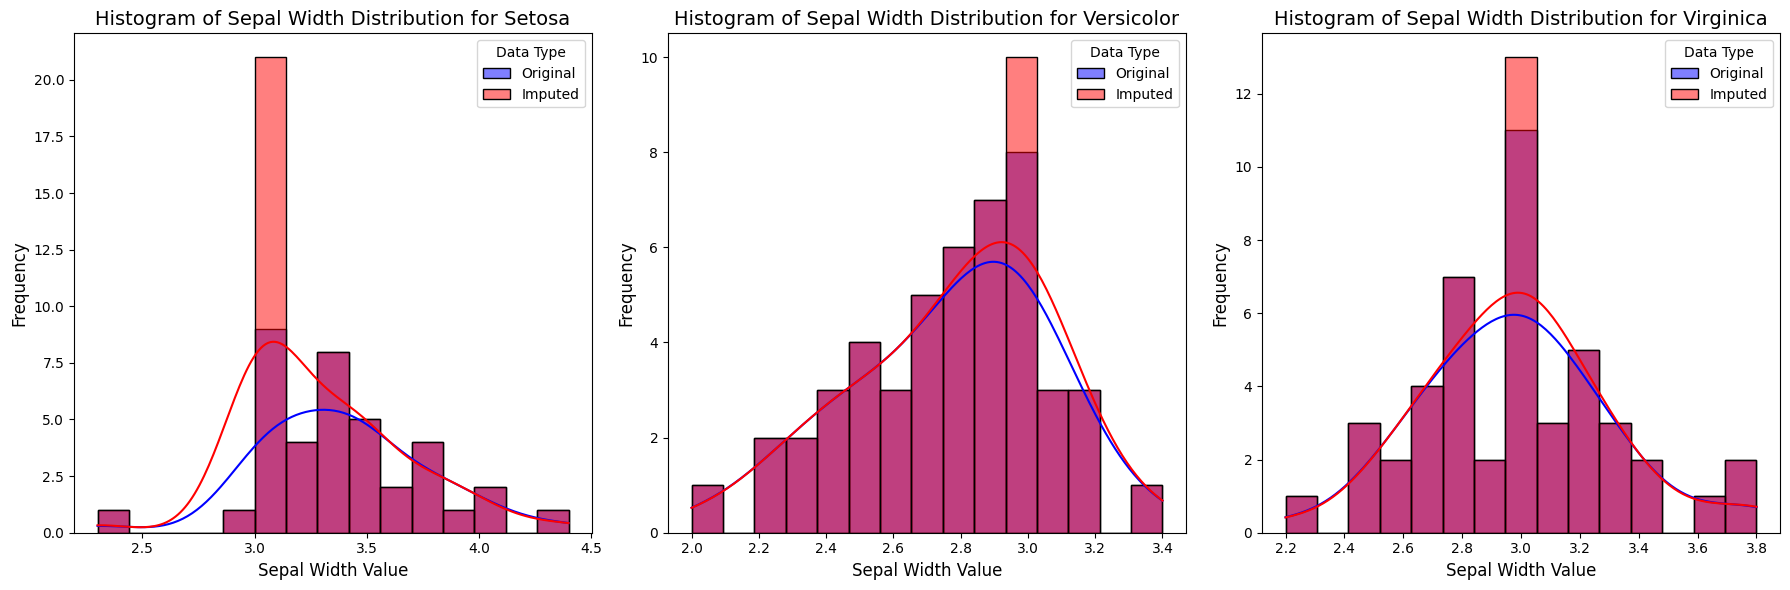

In [ ]:
comparison_data = pd.DataFrame({
    'Original': data['sepal_width'],
    'Imputed': data_imputed['sepal_width'],
    'Species': data['species']
})

plt.figure(figsize=(18, 6))

species_list = ['setosa', 'versicolor', 'virginica']
for i, species in enumerate(species_list, 1):
    species_data = comparison_data[comparison_data['Species'] == species]

    plt.subplot(1, 3, i)
    sns.histplot(species_data['Original'], color='blue', kde=True, label='Original', bins=15)
    sns.histplot(species_data['Imputed'], color='red', kde=True, label='Imputed', bins=15)

    plt.title(f'Histogram of Sepal Width Distribution for {species.capitalize()}', fontsize=14)
    plt.xlabel('Sepal Width Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Data Type')

plt.tight_layout()
plt.show()






As you can see, we significantly changed the distribution of the sepal width in the setosa class! Assigning the mean value to all of these items is not the best idea

**Imputation using the mean of that specific class.**

In [ ]:
data_cleaned = data.copy()
mean_by_species = data_cleaned.groupby('species')['sepal_width'].mean()

def impute_class_mean(row):
    if pd.isna(row['sepal_width']):
        return mean_by_species[row['species']]
    else:
        return row['sepal_width']

data_imputed = data_cleaned.copy()
data_imputed['sepal_width'] = data_imputed.apply(impute_class_mean, axis=1)

print(data_imputed.head())


   sepal_length  sepal_width  petal_length species
0           5.1     3.500000           1.4  setosa
1           4.9     3.389474           1.4  setosa
2           4.7     3.200000           1.3  setosa
3           4.6     3.100000           1.5  setosa
4           5.0     3.600000           1.4  setosa


Plot

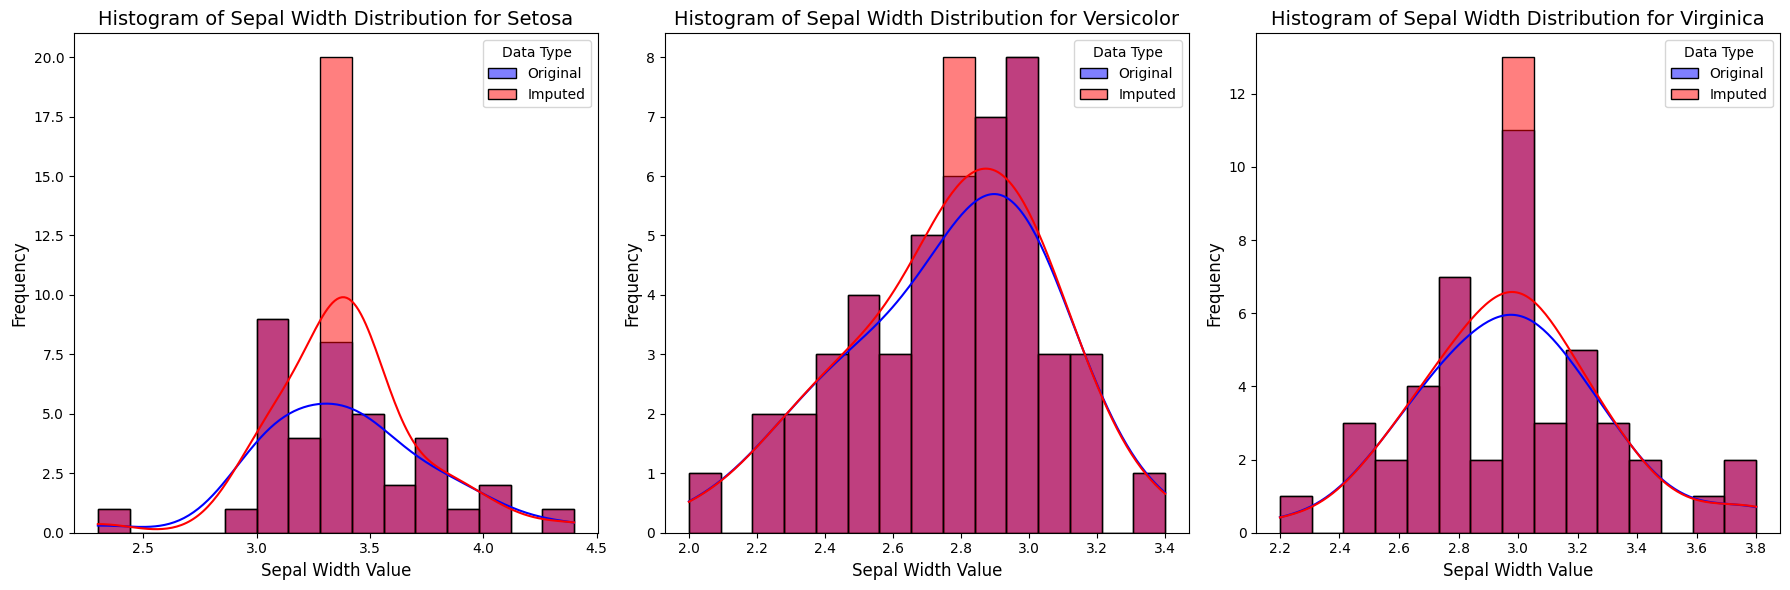

In [ ]:
comparison_data = pd.DataFrame({
    'Original': data_cleaned['sepal_width'],
    'Imputed': data_imputed['sepal_width'],
    'Species': data_cleaned['species']
})

plt.figure(figsize=(18, 6))

species_list = ['setosa', 'versicolor', 'virginica']
for i, species in enumerate(species_list, 1):
    species_data = comparison_data[comparison_data['Species'] == species]

    plt.subplot(1, 3, i)
    sns.histplot(species_data['Original'], color='blue', kde=True, label='Original', bins=15)
    sns.histplot(species_data['Imputed'], color='red', kde=True, label='Imputed', bins=15)

    plt.title(f'Histogram of Sepal Width Distribution for {species.capitalize()}', fontsize=14)
    plt.xlabel('Sepal Width Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Data Type')

plt.tight_layout()
plt.show()

Even this way, the results are not satisfying.

**Imputation using mean +- std method**

In [ ]:
import numpy as np

data_imputed = data_cleaned.copy()

def impute_random_range(col):
    if col.dtype == 'object':
        return col

    mean = col.mean()
    std = col.std()

    col_imputed = col.apply(lambda x: np.random.uniform(mean - std, mean + std) if pd.isna(x) else x)

    return col_imputed

data_imputed = data_imputed.apply(impute_random_range, axis=0)

print(data_imputed.head())



   sepal_length  sepal_width  petal_length species
0           5.1     3.500000           1.4  setosa
1           4.9     2.699904           1.4  setosa
2           4.7     3.200000           1.3  setosa
3           4.6     3.100000           1.5  setosa
4           5.0     3.600000           1.4  setosa


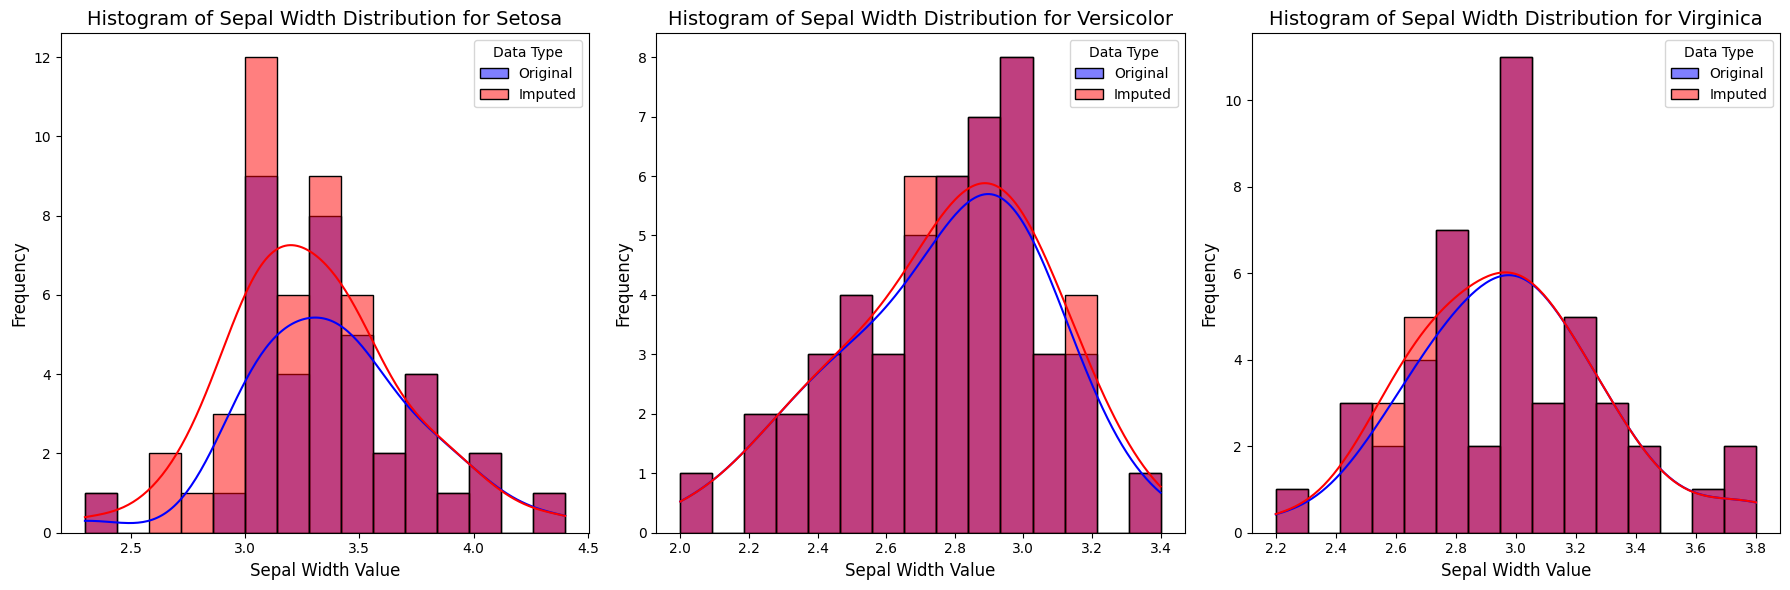

In [ ]:
comparison_data = pd.DataFrame({
    'Original': data_cleaned['sepal_width'],
    'Imputed': data_imputed['sepal_width'],
    'Species': data_cleaned['species']
})

plt.figure(figsize=(18, 6))

species_list = ['setosa', 'versicolor', 'virginica']
for i, species in enumerate(species_list, 1):
    species_data = comparison_data[comparison_data['Species'] == species]

    plt.subplot(1, 3, i)
    sns.histplot(species_data['Original'], color='blue', kde=True, label='Original', bins=15)
    sns.histplot(species_data['Imputed'], color='red', kde=True, label='Imputed', bins=15)

    plt.title(f'Histogram of Sepal Width Distribution for {species.capitalize()}', fontsize=14)
    plt.xlabel('Sepal Width Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Data Type')

plt.tight_layout()
plt.show()

We can do better by assigning mean +- std values for that specific class

In [ ]:
import numpy as np

data_imputed = data_cleaned.copy()

def impute_random_range_by_class(row, species_stats):
    if isinstance(row['sepal_width'], str):  # Check if the column is a string type
        return row['sepal_width']

    species = row['species']

    mean = species_stats[species]['mean']
    std = species_stats[species]['std']

    if pd.isna(row['sepal_width']):
        return np.random.uniform(mean - 2*std, mean + 2*std)
    else:
        return row['sepal_width']

species_stats = data_cleaned.groupby('species')['sepal_width'].agg(['mean', 'std']).to_dict('index')

data_imputed['sepal_width'] = data_imputed.apply(impute_random_range_by_class, axis=1, species_stats=species_stats)

print(data_imputed.head())


   sepal_length  sepal_width  petal_length species
0           5.1     3.500000           1.4  setosa
1           4.9     3.876774           1.4  setosa
2           4.7     3.200000           1.3  setosa
3           4.6     3.100000           1.5  setosa
4           5.0     3.600000           1.4  setosa


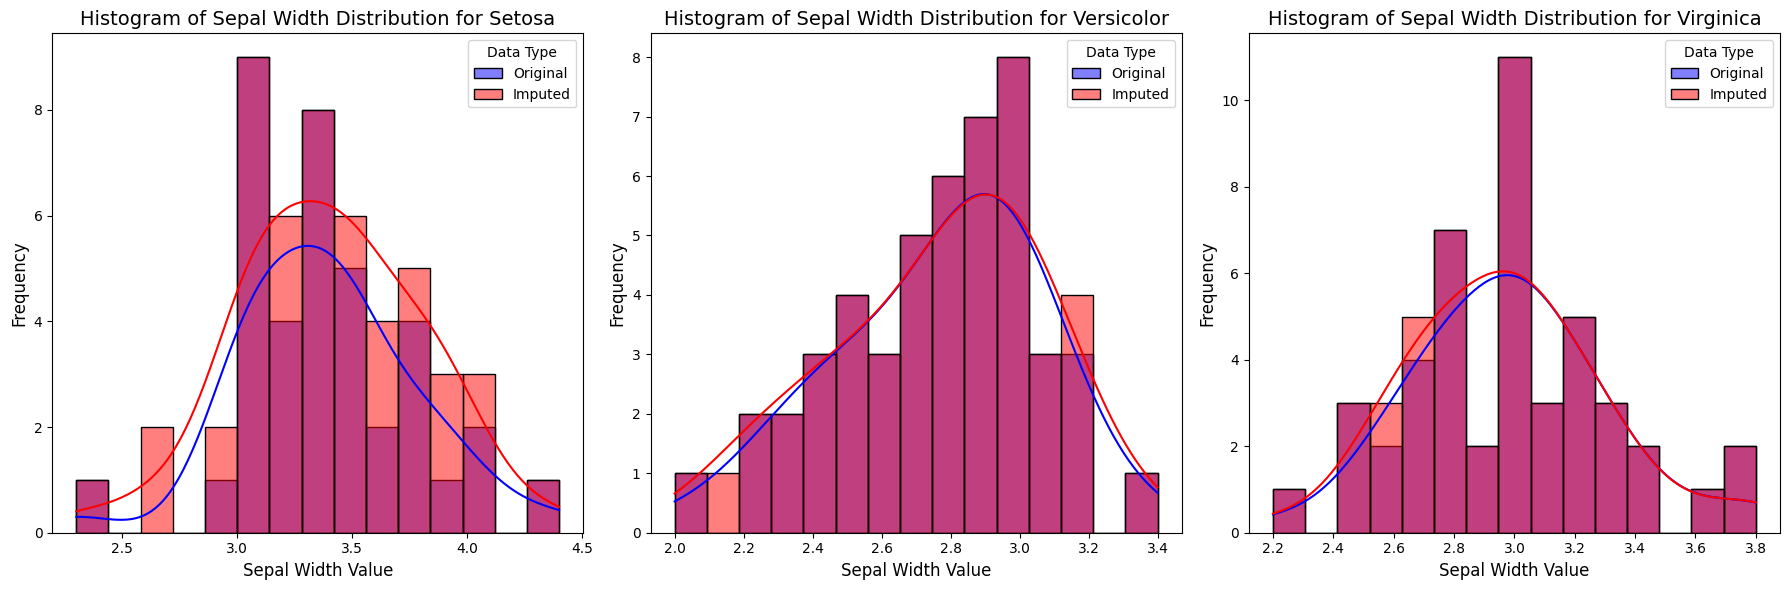

In [ ]:
comparison_data = pd.DataFrame({
    'Original': data_cleaned['sepal_width'],
    'Imputed': data_imputed['sepal_width'],
    'Species': data_cleaned['species']
})

plt.figure(figsize=(18, 6))

species_list = ['setosa', 'versicolor', 'virginica']
for i, species in enumerate(species_list, 1):
    species_data = comparison_data[comparison_data['Species'] == species]

    plt.subplot(1, 3, i)
    sns.histplot(species_data['Original'], color='blue', kde=True, label='Original', bins=15)
    sns.histplot(species_data['Imputed'], color='red', kde=True, label='Imputed', bins=15)

    plt.title(f'Histogram of Sepal Width Distribution for {species.capitalize()}', fontsize=14)
    plt.xlabel('Sepal Width Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Data Type')

plt.tight_layout()
plt.show()

We can try using the median +- IQR method

In [ ]:
import numpy as np

data_imputed = data_cleaned.copy()

def impute_random_range_by_class_median_iqr(row, species_stats):
    if isinstance(row['sepal_width'], str):  # Check if the column is a string type
        return row['sepal_width']

    species = row['species']
    median = species_stats[species]['median']
    iqr = species_stats[species]['IQR']
    if pd.isna(row['sepal_width']):
        return np.random.uniform(median - 1.5*iqr, median + 1.5*iqr)
    else:
        return row['sepal_width']

species_stats = data_cleaned.groupby('species')['sepal_width'].agg(
    median='median',
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25))
species_stats = species_stats.to_dict('index')

data_imputed['sepal_width'] = data_imputed.apply(impute_random_range_by_class_median_iqr, axis=1, species_stats=species_stats)

print(data_imputed.head())


   sepal_length  sepal_width  petal_length species
0           5.1     3.500000           1.4  setosa
1           4.9     3.309305           1.4  setosa
2           4.7     3.200000           1.3  setosa
3           4.6     3.100000           1.5  setosa
4           5.0     3.600000           1.4  setosa


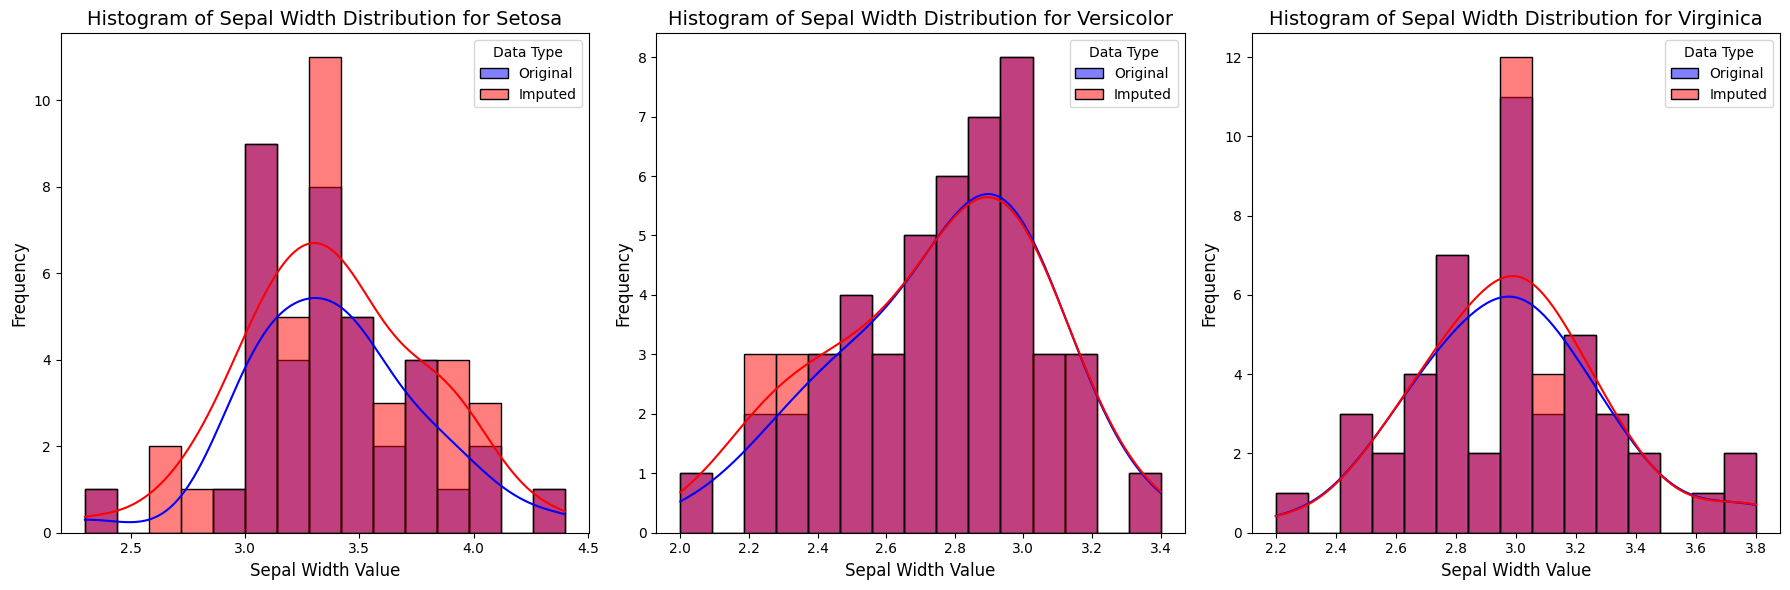

In [ ]:
comparison_data = pd.DataFrame({
    'Original': data_cleaned['sepal_width'],
    'Imputed': data_imputed['sepal_width'],
    'Species': data_cleaned['species']
})

plt.figure(figsize=(18, 6))

species_list = ['setosa', 'versicolor', 'virginica']
for i, species in enumerate(species_list, 1):
    species_data = comparison_data[comparison_data['Species'] == species]

    plt.subplot(1, 3, i)
    sns.histplot(species_data['Original'], color='blue', kde=True, label='Original', bins=15)
    sns.histplot(species_data['Imputed'], color='red', kde=True, label='Imputed', bins=15)

    plt.title(f'Histogram of Sepal Width Distribution for {species.capitalize()}', fontsize=14)
    plt.xlabel('Sepal Width Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title='Data Type')

plt.tight_layout()
plt.show()